## How does our std detrend etc function work? how should it work? how can we get it to play well with intake-esm?

In [ ]:
# how does this work? how *should* it work? 
#sd_hist = (xr.apply_ufunc(signal.detrend, data_tmp['hist']['pr'],kwargs={'axis': 0}).where(~data_tmp['hist'].isnull()).sel(time=data_tmp['hist'].time.dt.season.isin(seas)).std("time"))
    #sd_hist = (xr.apply_ufunc(signal.detrend, data_tmp['hist'].fillna(0),
    #                                kwargs={'axis': 0}).where(~data_tmp['hist'].isnull())
    #           .sel(time=data_tmp['hist'].time.dt.season.isin(seas))

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
from scipy import signal

#import pandas as pd
#import gcsfs
#from tqdm.autonotebook import tqdm
#import util

In [136]:
# this is a subset of pr data from 'hist' for testing 
# data[mod_name]['t'+time_slice[0]]['hist'].to_netcdf('testdataforstd.nc')
readin = xr.open_dataset('testdataforstd.nc')

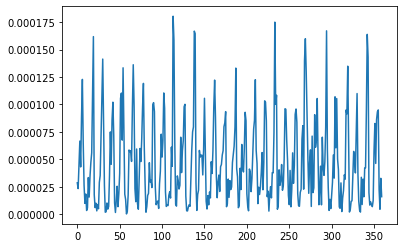

In [77]:
plt.plot(readin['pr'].isel(lat=40,lon=40))

In [78]:
testdata=readin['pr'].isel(lat=40,lon=40)

In [79]:
seas='DJF'

Text(0.5, 1.0, '30 years of data = 90 months')

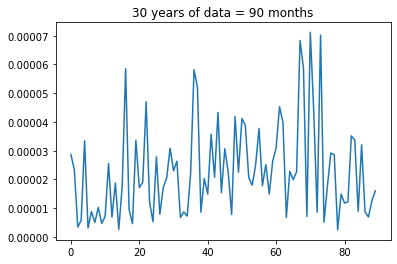

In [97]:
plt.plot(testdata.sel(time=readin.time.dt.season.isin(seas)))
plt.title("30 years of data = 90 months")

In [82]:
readin.time.dt.season

<xarray.DataArray 'season' (time: 360)>
array(['DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', '

In [83]:
readin.time.dt.season.isin(seas)

<xarray.DataArray 'season' (time: 360)>
array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, F

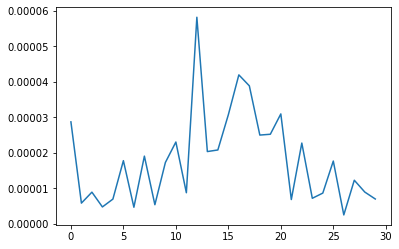

In [84]:
plt.plot(testdata.sel(time=readin.time.dt.month.isin(1))) # all jan

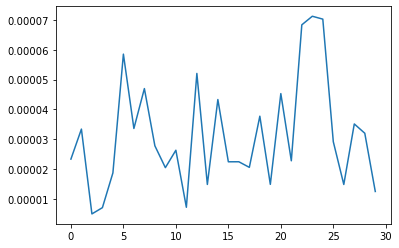

In [85]:
plt.plot(testdata.sel(time=readin.time.dt.month.isin(2))) # all feb

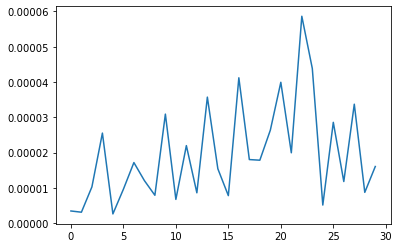

In [86]:
plt.plot(testdata.sel(time=readin.time.dt.month.isin(12))) # all dec

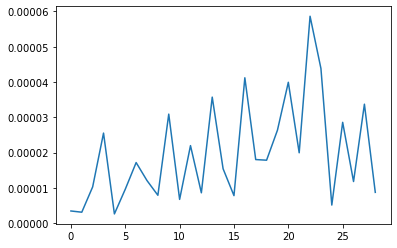

In [87]:
plt.plot(testdata.sel(time=readin.time.dt.month.isin(12))[0:-1]) # all but the last dec

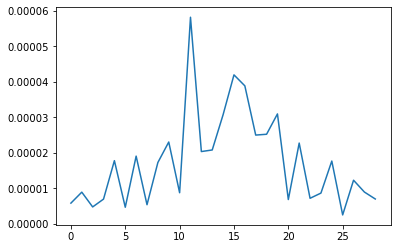

In [88]:
plt.plot(testdata.sel(time=readin.time.dt.month.isin(1))[1:]) # all but the first jan

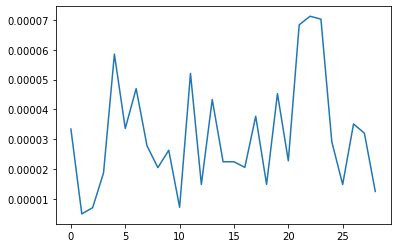

In [89]:
plt.plot(testdata.sel(time=readin.time.dt.month.isin(2))[1:]) # all but the first feb

In [90]:
dec = testdata.sel(time=readin.time.dt.month.isin(12))[0:-1]
jan = testdata.sel(time=readin.time.dt.month.isin(1))[1:]
feb = testdata.sel(time=readin.time.dt.month.isin(2))[1:]

In [91]:
timeseries_of_seasonalmeans = (np.array(dec)+np.array(jan)+np.array(feb))/3

In [92]:
timeseries_of_seasonalmeans

array([1.42291283e-05, 5.68456926e-06, 7.38557037e-06, 1.70785661e-05,
       2.62986159e-05, 1.59669416e-05, 2.77335002e-05, 1.50886481e-05,
       1.52273833e-05, 2.67583819e-05, 7.58020678e-06, 4.40641306e-05,
       1.46164675e-05, 3.32707568e-05, 2.28712070e-05, 2.40792815e-05,
       3.35556178e-05, 2.69145585e-05, 1.93299293e-05, 3.41944833e-05,
       2.31862232e-05, 3.69926202e-05, 4.56616108e-05, 4.08921733e-05,
       1.73327098e-05, 1.53207966e-05, 1.97364934e-05, 2.48924189e-05,
       9.41989674e-06], dtype=float32)

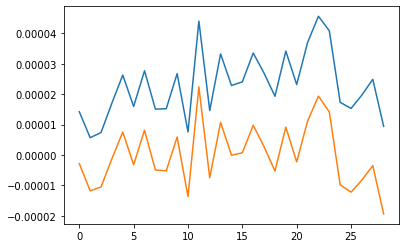

In [93]:
plt.plot(timeseries_of_seasonalmeans)
plt.plot(signal.detrend(timeseries_of_seasonalmeans))

In [95]:
# this is the correct STD, though it's based on only 29 years

In [96]:
signal.detrend(timeseries_of_seasonalmeans).std()

1.0104893e-05

In [98]:
testdata=readin['pr'].isel(lat=40,lon=40)
dec = testdata.sel(time=readin.time.dt.month.isin(12))[0:-1]
jan = testdata.sel(time=readin.time.dt.month.isin(1))[1:]
feb = testdata.sel(time=readin.time.dt.month.isin(2))[1:]
timeseries_of_seasonalmeans = (np.array(dec)+np.array(jan)+np.array(feb))/3
signal.detrend(timeseries_of_seasonalmeans).std()

1.0104893e-05

In [99]:
readin['pr'].sel(time=readin.time.dt.month.isin(12))[0:-1]

<xarray.DataArray 'pr' (time: 29, lat: 64, lon: 128)>
[237568 values with dtype=float32]
Coordinates:
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    member_id  object ...
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * time       (time) object 1976-12-16 12:00:00 ... 2004-12-16 12:00:00
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  PCP
    cell_methods:   area: time: mean
    cell_measures:  area: areacella

In [100]:
dec = readin['pr'].sel(time=readin.time.dt.month.isin(12))[0:-1]

In [102]:
dec.shape

(29, 64, 128)

In [103]:
dec = readin['pr'].sel(time=readin.time.dt.month.isin(12))[0:-1]
jan = readin['pr'].sel(time=readin.time.dt.month.isin(1))[1:]
feb = readin['pr'].sel(time=readin.time.dt.month.isin(2))[1:]
timeseries_of_seasonalmeans = (np.array(dec)+np.array(jan)+np.array(feb))/3


In [105]:
timeseries_of_seasonalmeans.shape

(29, 64, 128)

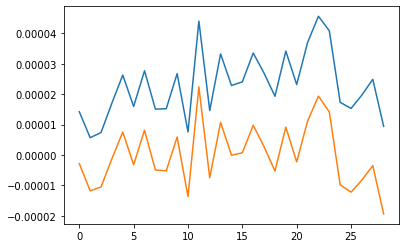

In [112]:
plt.plot(timeseries_of_seasonalmeans[:,40,40])
plt.plot(signal.detrend(timeseries_of_seasonalmeans,axis=0)[:,40,40])

In [117]:
signal.detrend(timeseries_of_seasonalmeans,axis=0).std(axis=0)[40,40]

1.0104894e-05

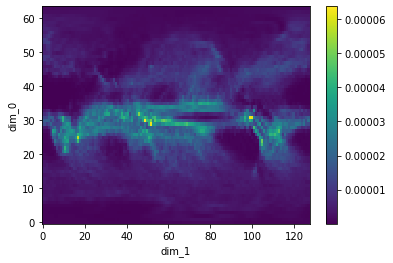

In [115]:
xr.DataArray(signal.detrend(timeseries_of_seasonalmeans,axis=0).std(axis=0)).plot()

In [120]:
dec = readin['pr'].sel(time=readin.time.dt.month.isin(12))[0:-1]
jan = readin['pr'].sel(time=readin.time.dt.month.isin(1))[1:]
feb = readin['pr'].sel(time=readin.time.dt.month.isin(2))[1:]
timeseries_of_seasonalmeans = (np.array(dec)+np.array(jan)+np.array(feb))/3
pr_std = signal.detrend(timeseries_of_seasonalmeans,axis=0).std(axis=0)

In [121]:
pr_std

array([[7.6267929e-07, 7.6333822e-07, 7.5523911e-07, ..., 7.7520531e-07,
        7.6303951e-07, 7.5783362e-07],
       [7.0717510e-07, 6.4941656e-07, 5.8762106e-07, ..., 9.3787622e-07,
        8.4503262e-07, 7.5775046e-07],
       [6.8542920e-07, 6.3324393e-07, 5.9069123e-07, ..., 7.7025283e-07,
        7.3269251e-07, 7.1316009e-07],
       ...,
       [3.6993704e-06, 3.6072383e-06, 3.5596468e-06, ..., 3.9337310e-06,
        3.8835778e-06, 3.7999341e-06],
       [2.4035667e-06, 2.3419298e-06, 2.3117582e-06, ..., 2.7631565e-06,
        2.6650466e-06, 2.5800441e-06],
       [1.7305614e-06, 1.7195778e-06, 1.7356975e-06, ..., 1.6360036e-06,
        1.6680297e-06, 1.6884552e-06]], dtype=float32)

In [123]:
pr_std.shape

(64, 128)

In [122]:
readin['pr']

<xarray.DataArray 'pr' (time: 360, lat: 64, lon: 128)>
[2949120 values with dtype=float32]
Coordinates:
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    member_id  object ...
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * time       (time) object 1976-01-16 12:00:00 ... 2005-12-16 12:00:00
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  PCP
    cell_methods:   area: time: mean
    cell_measures:  area: areacella

In [132]:
readin.lat

<xarray.DataArray 'lat' (lat: 64)>
array([-87.863799, -85.096527, -82.312913, -79.525607, -76.7369  , -73.947515,
       -71.157752, -68.367756, -65.577607, -62.787352, -59.99702 , -57.206632,
       -54.4162  , -51.625734, -48.835241, -46.044727, -43.254195, -40.463648,
       -37.67309 , -34.882521, -32.091944, -29.30136 , -26.510769, -23.720174,
       -20.929574, -18.138971, -15.348365, -12.557756,  -9.767146,  -6.976534,
        -4.185921,  -1.395307,   1.395307,   4.185921,   6.976534,   9.767146,
        12.557756,  15.348365,  18.138971,  20.929574,  23.720174,  26.510769,
        29.30136 ,  32.091944,  34.882521,  37.67309 ,  40.463648,  43.254195,
        46.044727,  48.835241,  51.625734,  54.4162  ,  57.206632,  59.99702 ,
        62.787352,  65.577607,  68.367756,  71.157752,  73.947515,  76.7369  ,
        79.525607,  82.312913,  85.096527,  87.863799])
Coordinates:
    member_id  object ...
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
Att

In [133]:
pr_std = xr.DataArray(pr_std,coords=[readin.lat,readin.lon],dims=['lat','lon'])

In [134]:
pr_std

<xarray.DataArray (lat: 64, lon: 128)>
array([[7.6267929e-07, 7.6333822e-07, 7.5523911e-07, ..., 7.7520531e-07,
        7.6303951e-07, 7.5783362e-07],
       [7.0717510e-07, 6.4941656e-07, 5.8762106e-07, ..., 9.3787622e-07,
        8.4503262e-07, 7.5775046e-07],
       [6.8542920e-07, 6.3324393e-07, 5.9069123e-07, ..., 7.7025283e-07,
        7.3269251e-07, 7.1316009e-07],
       ...,
       [3.6993704e-06, 3.6072383e-06, 3.5596468e-06, ..., 3.9337310e-06,
        3.8835778e-06, 3.7999341e-06],
       [2.4035667e-06, 2.3419298e-06, 2.3117582e-06, ..., 2.7631565e-06,
        2.6650466e-06, 2.5800441e-06],
       [1.7305614e-06, 1.7195778e-06, 1.7356975e-06, ..., 1.6360036e-06,
        1.6680297e-06, 1.6884552e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

In [135]:
dec = readin['pr'].sel(time=readin.time.dt.month.isin(12))[0:-1]
jan = readin['pr'].sel(time=readin.time.dt.month.isin(1))[1:]
feb = readin['pr'].sel(time=readin.time.dt.month.isin(2))[1:]
timeseries_of_seasonalmeans = (np.array(dec)+np.array(jan)+np.array(feb))/3
pr_std = signal.detrend(timeseries_of_seasonalmeans,axis=0).std(axis=0)
pr_std = xr.DataArray(pr_std,coords=[readin.lat,readin.lon],dims=['lat','lon'])